<a href="https://colab.research.google.com/github/inuwamobarak/Image-captioning-transformers/blob/main/Image_Captioning_using_Transformer_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.2 MB/s eta 0:00:00


In [2]:
import requests
import torch
from PIL import Image
from transformers import *
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attentio

# Using a Trained Model

In [3]:
# load a fine-tuned image captioning model and corresponding tokenizer and image processor
finetuned_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)
finetuned_tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
finetuned_image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/config.json
Model config VisionEncoderDecoderConfig {
  "_commit_hash": "dc68f91c06a1ba6f15268e5b9c13ae7a7c514084",
  "_name_or_path": "vit-gpt-pt",
  "architectures": [
    "VisionEncoderDecoderModel"
  ],
  "bos_token_id": 50256,
  "decoder": {
    "_name_or_path": "",
    "activation_function": "gelu_new",
    "add_cross_attention": true,
    "architectures": [
      "GPT2LMHeadModel"
    ],
    "attn_pdrop": 0.1,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 50256,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": 50256,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "early_stopping": false,
    "embd_pdrop": 0.1,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 50256,
    "exponential_decay_leng

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/pytorch_model.bin
Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.30.2"
}

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.30.2"
}

Some weights of the model checkpoint at nlpconnect/vit-gpt2-image-captioning were not used when initializing VisionEncoderDecoderModel: ['decoder.transformer.h.11.crossattention.masked_bias', 'decoder.transformer.h.2.attn.masked_bias', 'decoder.transformer.h.8.attn.bias', 'decoder.transformer.h.4.crossattention.masked_bias', 'decoder.transformer.h.4.crossattention.bias', 'de

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/merges.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/tokenizer_config.json


loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'shortest_edge', 'longest_edge'}, {'longest_edge'}), got 224. Converted to {'height': 224, 'width': 224}.
Image processor ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



In [4]:
import urllib.parse as parse
import os

# a function to determine whether a string is a URL or not
def is_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

# a function to load an image
def load_image(image_path):
    if is_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)


# a function to perform inference
def get_caption(model, image_processor, tokenizer, image_path):
    image = load_image(image_path)
    # preprocess the image
    img = image_processor(image, return_tensors="pt").to(device)
    # generate the caption (using greedy decoding by default)
    output = model.generate(**img)
    # decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    return caption

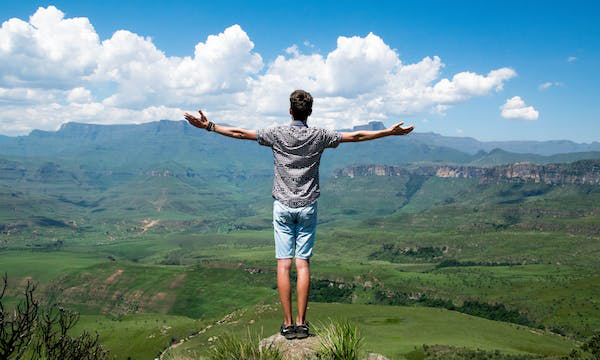

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.30.2"
}

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'a man standing on top of a hill with a mountain '

In [5]:
# load displayer
from IPython.display import display

url = "https://images.pexels.com/photos/103123/pexels-photo-103123.jpeg?auto=compress&cs=tinysrgb&w=600"
display(load_image(url))
get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, url)

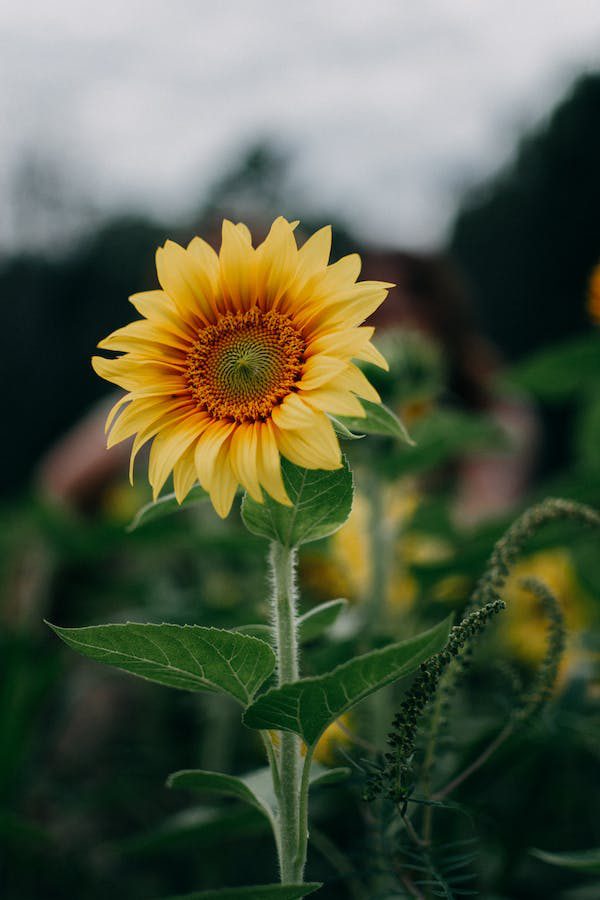

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.30.2"
}



'a flower in a vase with a bunch of leaves '

In [6]:
# load displayer
from IPython.display import display

url = "https://images.pexels.com/photos/1366630/pexels-photo-1366630.jpeg?auto=compress&cs=tinysrgb&w=600"
display(load_image(url))
get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, url)

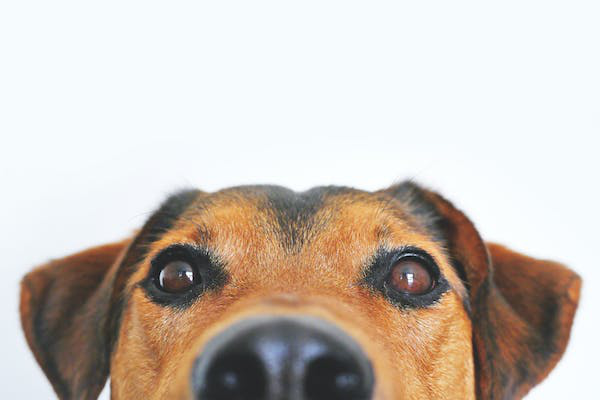

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.30.2"
}



'a dog with a long nose '

In [7]:
# load displayer
from IPython.display import display

url = "https://images.pexels.com/photos/406014/pexels-photo-406014.jpeg?auto=compress&cs=tinysrgb&w=600"
display(load_image(url))
get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, url)

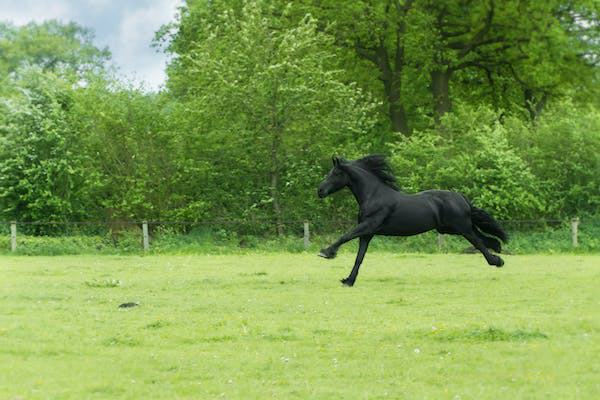

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.30.2"
}



'a black horse running through a grassy field '

In [8]:
# load displayer
from IPython.display import display

url = "https://images.pexels.com/photos/101667/pexels-photo-101667.jpeg?auto=compress&cs=tinysrgb&w=600"
display(load_image(url))
get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, url)